In [22]:
import pandas as pd

import matplotlib.pyplot as plt

In [23]:
housing_data = pd.read_csv('housing.csv')
housing_data = housing_data.dropna()
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19691,-121.62,39.12,35.0,2787.0,587.0,1431.0,601.0,2.5469,65900.0,INLAND
17548,-121.87,37.35,27.0,3500.0,1036.0,3019.0,955.0,2.9222,153700.0,<1H OCEAN
18702,-122.34,40.57,24.0,1610.0,307.0,748.0,307.0,2.6591,82800.0,INLAND
13777,-117.08,34.02,20.0,3111.0,563.0,1453.0,538.0,3.3365,122800.0,INLAND
6049,-117.74,34.04,27.0,2215.0,440.0,1987.0,449.0,3.0429,129600.0,INLAND


In [24]:
housing_data.shape

(20433, 10)

In [25]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [26]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [27]:
housing_data.shape

(19475, 10)

In [28]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [30]:
housing_data.shape

(19475, 14)

In [31]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [32]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [33]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

In [35]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [36]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [18]:
type(y_train)

pandas.core.series.Series

In [19]:
type(x_train)

pandas.core.frame.DataFrame

In [37]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [38]:
print("Training_score : ", linear_model.score(x_train, y_train))

Training_score :  0.608285449661665


In [39]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [40]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(type(coef))
print(coef)

<class 'pandas.core.series.Series'>
ocean_proximity_INLAND        -25786.235015
longitude                     -24196.435517
latitude                      -22144.394569
population                       -29.112764
total_rooms                       -7.832935
households                        42.382563
total_bedrooms                    92.424942
housing_median_age               915.227579
ocean_proximity_NEAR BAY        5757.029202
ocean_proximity_<1H OCEAN      12784.466973
ocean_proximity_NEAR OCEAN     17842.503946
median_income                  38504.491429
ocean_proximity_ISLAND        140530.549620
dtype: float64


In [41]:
y_pred = linear_model.predict(x_test)

In [42]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
848,244124.579588,213700.0
8836,234180.771956,312500.0
6028,193064.914145,140100.0
15489,201980.375375,153900.0
17059,347070.614158,362700.0
16386,135603.535042,82800.0
16478,134636.830071,113000.0
6448,256409.450641,430200.0
13214,206417.814881,161800.0
3367,11867.449279,73500.0


In [43]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6308995253105367


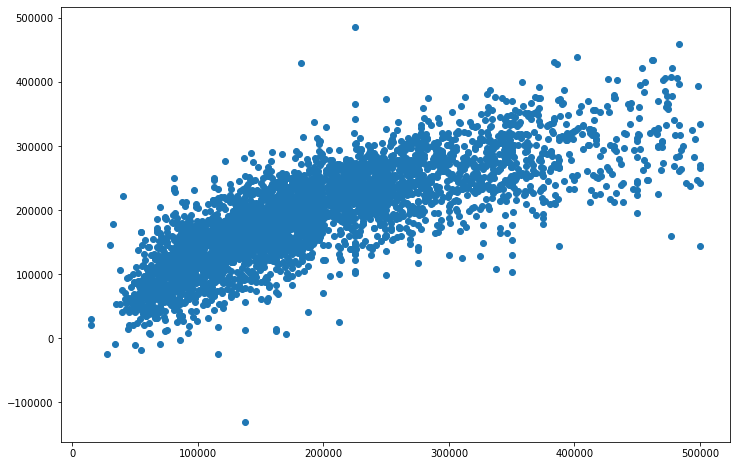

In [44]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [45]:
df_pred_actual_sample = df_pred_actual.sample(100)

df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [46]:
df_pred_actual_sample.head()

,index,predicted,actual
0,8673,263004.825239,427200.0
1,1699,280222.566520,201000.0
2,2195,128959.692190,82800.0
3,9075,198837.493265,127700.0
4,14854,162407.207424,95600.0


In [47]:
len(df_pred_actual)

3895

In [48]:
len(df_pred_actual_sample)

100

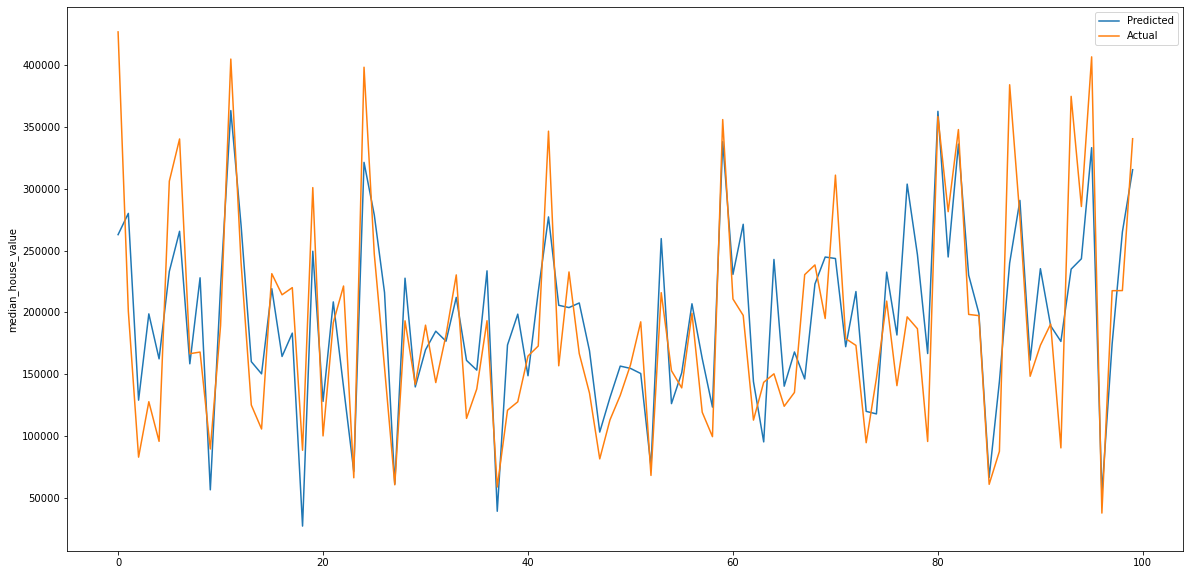

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()